In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 128
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 319 		 0.34 		 0.46 |
| 3168 		 0.08 		 0.19 |
| 2825 		 0.17 		 0.33 |
| 1951 		 0.2 		 0.06 |
| 452 		 0.05 		 0.04 |
| 417 		 0.16 		 0.1 |
| 407 		 0.34 		 0.0 |
| 1481 		 0.51 		 0.06 |
| 1161 		 0.13 		 0.09 |
| 142 		 0.03 		 0.0 |
| 2711 		 0.2 		 0.06 |
| 656 		 0.05 		 0.14 |
| 4132 		 0.08 		 0.42 |
| 4474 		 0.02 		 0.21 |
| 1677 		 0.25 		 0.39 |
| 370 		 0.36 		 0.25 |
| 3452 		 0.09 		 0.41 |
| 4762 		 0.36 		 0.3 |
| 311 		 0.02 		 0.43 |
-------------------------------------
The s.d. of M is: 1221.0
The s.d. of E is: 0.14
The s.d. of I is: 0.15
-------------------------------------
The mean of M is: 1873
The mean of E is: 0.23
The mean of I is: 0.2
-------------------------------------


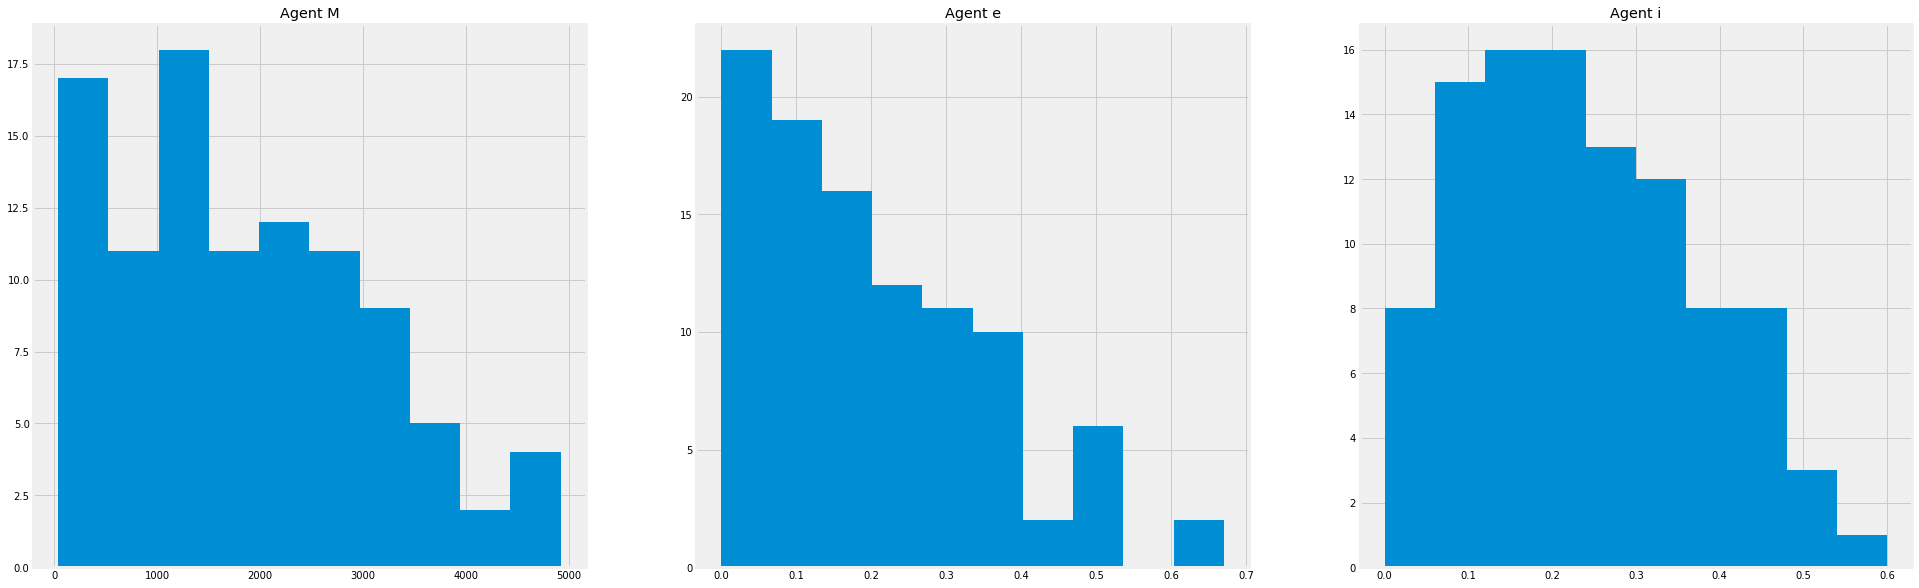

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 961.0, Temptation: 1077.0, Sucker: -117.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 5.0, Temptation: 26.0, Sucker: -21.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 740.0, Temptation: 961.0, Sucker: -221.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 18.0, Temptation: 54.0, Sucker: -36.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 484.0, Temptation: 663.0, Sucker: -179.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 57.0, Temptation: 64.0,

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 2000]
E = [0.1, 0.2]
I = [0.1, 0.2]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

Tournament has started...
Tournament has ended. The simulation took 14 minutes.
    S.D.  Counts
0    0.5     201
1    0.6     190
2    0.7     200
3    0.8     200
4    0.9     184
5    1.0     185
6    1.1     191
7    1.2     170
8    1.3     146
9    1.4     119
10   1.5     116
11   1.6      93
12   1.7      61
13   1.8      35
14   1.9      31
15   2.0      22
16   2.1       8
17   2.2       9
18   2.3      13
19   2.4      11
20   2.5       7
21   2.6       2
22   2.7       0
23   2.8       0
24   2.9       0
25   3.0       0


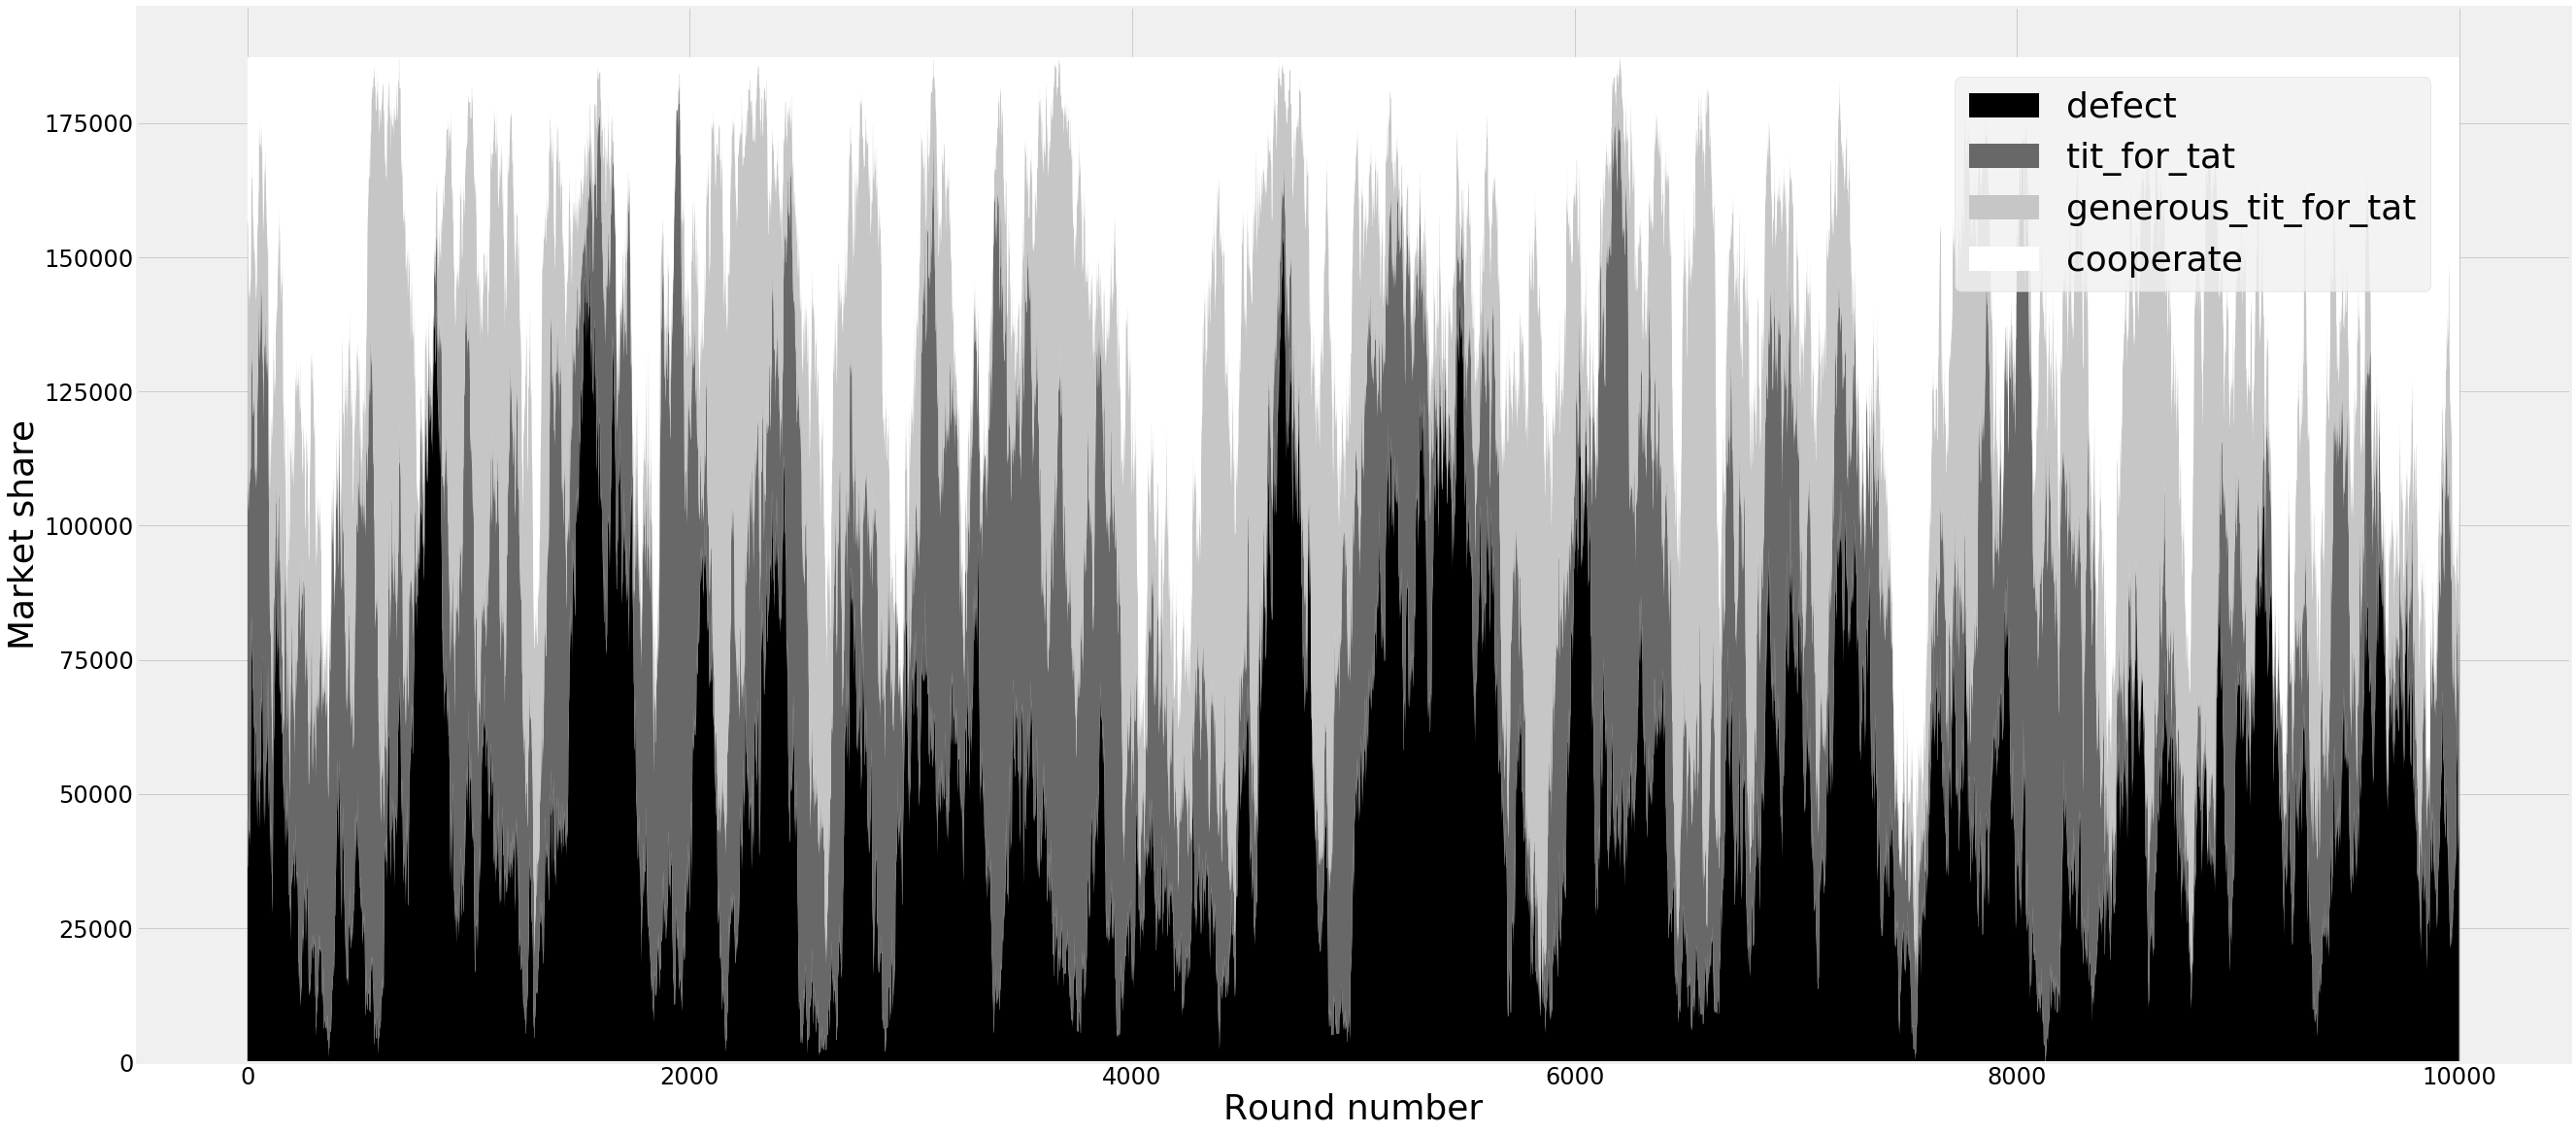

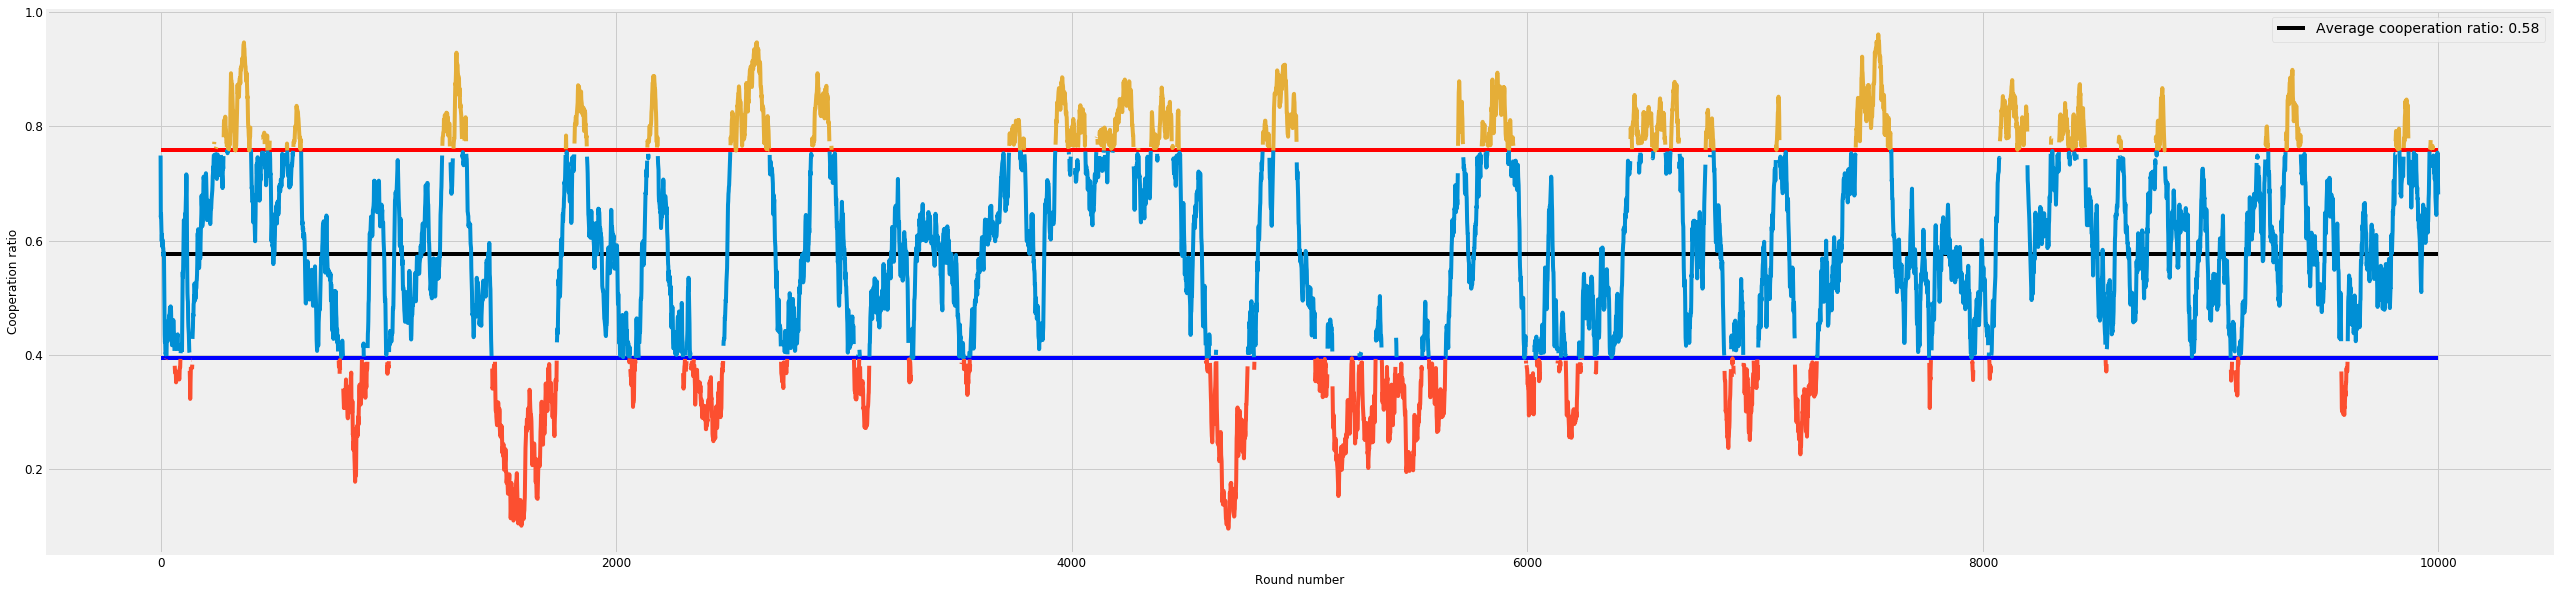

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "complete_heterogeneity", seed = str(seed))